All the necessary imports and so forth

In [1]:
import pandas as pd
import numpy as np

## Use Case
#### You are given given data of a patient that contains several biometric data, and a nurse asks you a way to visualize the heart rate of said patient across time.



This type of data can be quasi-real-time, real-time or static.

In this case, we have the data of a patient that is not longer being monitored. Hence, it is already in a nice and structured csv format.

We already load the data for you, and now you are to follow the nurse requirements!
Also, keep in mind that in the real world the requirements change constantly, so expect things to change as you go!

In [2]:
path = "patient.csv" #.csv file of one patient
df = pd.read_csv(path,index_col= 0) #Inspect the csv and read the docs to undersand why we had to set the param index_col = 0
df.index = pd.to_datetime(df.index) #Why do we need to do this?

With the data loaded, you inspect the file, to understand its structure.

In [3]:
df

,steps,heartrate,Weight,bpm,diastolic,irreghr,systolic
2020-07-20 14:29:52.111,NaN,NaN,86.5,NaN,NaN,NaN,NaN
2020-07-20 14:35:15.963,NaN,NaN,NaN,69.0,84.0,0.0,125.0
2020-07-20 14:45:00.000,NaN,73.0,NaN,NaN,NaN,NaN,NaN
2020-07-20 14:47:00.000,NaN,55.0,NaN,NaN,NaN,NaN,NaN
2020-07-20 14:49:00.000,NaN,73.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2020-08-18 15:16:00.000,NaN,45.0,NaN,NaN,NaN,NaN,NaN
2020-08-18 15:26:00.000,NaN,68.0,NaN,NaN,NaN,NaN,NaN
2020-08-18 15:36:00.000,NaN,67.0,NaN,NaN,NaN,NaN,NaN
2020-08-18 15:46:00.000,NaN,69.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,steps,heartrate,Weight,bpm,diastolic,irreghr,systolic
count,28.000000,8781.000000,30.000000,31.000000,31.000000,31.0,31.000000
mean,3659.607143,64.026193,84.353332,66.322581,79.838710,0.0,136.516129
std,1771.767674,9.164791,2.031601,3.515557,4.382517,0.0,11.269046
min,930.000000,41.000000,81.799995,61.000000,70.000000,0.0,116.000000
25%,2499.250000,58.000000,82.400002,64.000000,78.000000,0.0,128.500000
50%,3325.000000,63.000000,83.849998,66.000000,80.000000,0.0,135.000000
75%,4592.000000,68.000000,86.724997,69.500000,83.500000,0.0,143.500000
max,8727.000000,169.000000,87.299995,73.000000,89.000000,0.0,159.000000


### Exercise 1:
##### The nurse is only interested on the heart rate field.

In [5]:
heart_rate = df[["heartrate"]]

In [6]:
heart_rate

,heartrate
2020-07-20 14:29:52.111,NaN
2020-07-20 14:35:15.963,NaN
2020-07-20 14:45:00.000,73.0
2020-07-20 14:47:00.000,55.0
2020-07-20 14:49:00.000,73.0
...,...
2020-08-18 15:16:00.000,45.0
2020-08-18 15:26:00.000,68.0
2020-08-18 15:36:00.000,67.0
2020-08-18 15:46:00.000,69.0


### Exercise 2
##### The nurse wants to see the max, min and average of the patients heartrate

In [7]:
heart_rate.agg([np.min,np.max,np.mean])

,heartrate
amin,41.000000
amax,169.000000
mean,64.026193


### Exercise 2.1
##### The nurse wants to know the max, min and average of the patients heart rate by day

In [8]:
heart_rate.resample("1D").agg([np.min,np.max,np.mean])

heartrate                  
                amin   amax       mean
2020-07-20      44.0  101.0  76.948718
2020-07-21      44.0   98.0  70.250000
2020-07-22      41.0  135.0  65.167213
2020-07-23      46.0  155.0  66.514851
2020-07-24      46.0  111.0  61.446667
2020-07-25      47.0  147.0  64.865801
2020-07-26      51.0  114.0  62.252632
2020-07-27      49.0  129.0  60.962963
2020-07-28      45.0   99.0  62.797414
2020-07-29      45.0  131.0  64.834711
2020-07-30      43.0  102.0  66.187500
2020-07-31      42.0  102.0  64.654545
2020-08-01      43.0  102.0  64.210366
2020-08-02      42.0  113.0  62.983498
2020-08-03      50.0   93.0  60.376384
2020-08-04      47.0  118.0  60.775000
2020-08-05      45.0  114.0  63.059801
2020-08-06      42.0  106.0  64.328729
2020-08-07      48.0  121.0  60.892442
2020-08-08      41.0  113.0  61.423977
2020-08-09      50.0  115.0  63.623932
2020-08-10      46.0   99.0  64.122995
2020-08-11      43.0  169.0  63.487179
2020-08-12      43.0   93.0  61.889807
2020-08-13      44.0  147.0  64.396694
2020-08-14      41.0  147.0  64.009585
2020-08-15      42.0  140.0  64.086420
2020-08-16      42.0  155.0  68.003215
2020-08-17      44.0  141.0  67.346260
2020-08-18      45.0   99.0  68.422794

### Exercise 2.2
##### The nurse wants to see the max, min and average of the patients heart rate by 3H but only in the last 7 days of measures

In [9]:
mask = (heart_rate.index.max() - heart_rate.index).days <=7


In [10]:
heart_rate.loc[mask].resample("3H").agg([np.min,np.max,np.mean])

heartrate                 
                         amin  amax       mean
2020-08-10 15:00:00      63.0  87.0  71.107143
2020-08-10 18:00:00      63.0  99.0  76.176471
2020-08-10 21:00:00      49.0  75.0  64.555556
2020-08-11 00:00:00      51.0  70.0  57.540000
2020-08-11 03:00:00      46.0  82.0  53.950000
...                       ...   ...        ...
2020-08-18 03:00:00      52.0  75.0  66.566667
2020-08-18 06:00:00      56.0  87.0  67.878788
2020-08-18 09:00:00      57.0  99.0  75.956522
2020-08-18 12:00:00      57.0  86.0  75.444444
2020-08-18 15:00:00      45.0  69.0  62.333333

[65 rows x 3 columns]

### Exercise 2.3
##### The nurse wants to see the max, min and average of the patients heart rate by 3H, but only night time (Between 23 and 8)

In [11]:
mask = (heart_rate.index.hour >=23) | (heart_rate.index.hour <=8)

In [12]:
heart_rate.loc[mask].resample("3H").agg([np.min,np.max,np.mean])

heartrate                 
                         amin  amax       mean
2020-07-20 21:00:00      64.0  95.0  78.500000
2020-07-21 00:00:00      61.0  86.0  66.465517
2020-07-21 03:00:00      59.0  70.0  63.473684
2020-07-21 06:00:00      60.0  98.0  67.805556
2020-07-21 09:00:00       NaN   NaN        NaN
...                       ...   ...        ...
2020-08-17 18:00:00       NaN   NaN        NaN
2020-08-17 21:00:00      56.0  68.0  63.500000
2020-08-18 00:00:00      50.0  76.0  67.550725
2020-08-18 03:00:00      52.0  75.0  66.566667
2020-08-18 06:00:00      56.0  87.0  67.878788

[228 rows x 3 columns]

*If there are any NaNs, just drop it like its hot!*

## Exercise 2.4
### The nurse now wants to see both the day time and night time, but differentiated!
*Use 3H as the resampling size*

In [13]:
heart_rate.insert(0,"Period", ["Night" if x else "Day" for x in mask ]) #To help group

In [14]:
heart_rate.groupby("Period").resample("3H").mean().dropna()

heartrate
Period                               
Day    2020-07-20 12:00:00  69.500000
       2020-07-20 15:00:00  78.937500
       2020-07-20 18:00:00  76.076923
       2020-07-21 09:00:00  73.062500
       2020-07-21 12:00:00  77.861111
...                               ...
Night  2020-08-17 06:00:00  58.227848
       2020-08-17 21:00:00  63.500000
       2020-08-18 00:00:00  67.550725
       2020-08-18 03:00:00  66.566667
       2020-08-18 06:00:00  67.878788

[259 rows x 1 columns]

### Exercise 3.
#### The nurse is complaining that she takes too long to read the numbers on a table, instead she wants too see pretty lines on a plot.
Plot only exercises 2.1 and 2.2

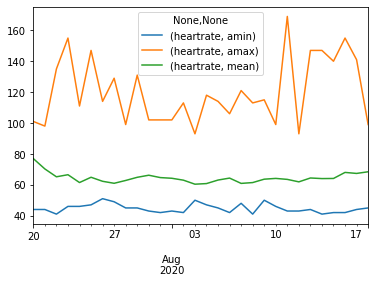

In [15]:
heart_rate.resample("1D").agg([np.min,np.max,np.mean]).plot()

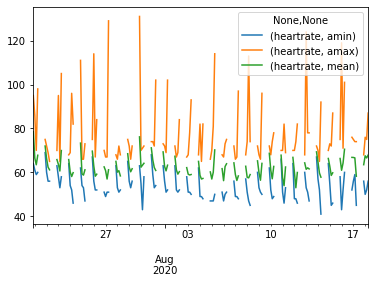

In [16]:
heart_rate.loc[mask].resample("3H").agg([np.min,np.max,np.mean]).plot()

### Exercise 4
#### The nurse is enjoying the plots, but she thinks that they are a bit hard to read.  
##### Use Bokeh to enrich these visualizations!

In [17]:
from bokeh.plotting import figure,show
from bokeh.io import output_notebook
from bokeh.models import Legend,LegendItem,Range1d,ColumnDataSource,DatetimeTickFormatter, Text,LabelSet,DateRangeSlider,HoverTool,MultiLine,LinearAxis
from bokeh.layouts import row,column
output_notebook()

Loading BokehJS ...

### Exercise 4.1
#### The nurse wants to visualize the mean of the heart rate each 3H.

In [18]:
res = heart_rate.resample("3H").mean()

In [19]:
res.index

DatetimeIndex(['2020-07-20 12:00:00', '2020-07-20 15:00:00',
               '2020-07-20 18:00:00', '2020-07-20 21:00:00',
               '2020-07-21 00:00:00', '2020-07-21 03:00:00',
               '2020-07-21 06:00:00', '2020-07-21 09:00:00',
               '2020-07-21 12:00:00', '2020-07-21 15:00:00',
               ...
               '2020-08-17 12:00:00', '2020-08-17 15:00:00',
               '2020-08-17 18:00:00', '2020-08-17 21:00:00',
               '2020-08-18 00:00:00', '2020-08-18 03:00:00',
               '2020-08-18 06:00:00', '2020-08-18 09:00:00',
               '2020-08-18 12:00:00', '2020-08-18 15:00:00'],
              dtype='datetime64[ns]', length=234, freq='3H')

In [20]:
fig = figure(width=800,height=500,x_axis_type="datetime",x_axis_label="Time",y_axis_label="Heartrate")
fig.line(res.index,res["heartrate"],legend_label="mean",color="orange")
show(fig)

### Exercise 4.2
#### The nurse now also wants to have the standard deviation present on the plot to understand how much it varies.

In [21]:
res = heart_rate.resample("3H").std(ddof=1) #Compute the std(ddof=1) 

In [22]:
fig.line(res.index,res["heartrate"],legend_label="mean",color="orange")  #Add the computed std to the plot


GlyphRenderer(id='1190', ...)

In [23]:
show(fig)

## Exercise 4.3
#### The nurse does not like the previous plot. She suggests to put the standard deviation as an area around the mean.
*You can keep using 3 hours as your sample*

In [24]:
mean = heart_rate.resample("3H").mean()

In [25]:
interval = (mean.index.min(),mean.index.max())

In [26]:
fig = figure(width=800,height=500,x_axis_type="datetime",x_axis_label="Time",y_axis_label="Heartrate",x_range=Range1d(start = interval[0],end=interval[1],bounds=interval))

In [27]:
fig.line(mean.index,mean["heartrate"],legend_label="mean",color="orange") #Add the heartrate line, you know the drill by now.

GlyphRenderer(id='1412', ...)

In [28]:
std = heart_rate.resample("3H").std(ddof=1)

In [29]:
#Get the upper and lower bounds of the area
upper = mean+std
lower = mean-std

In [30]:
fig.varea(x=mean.index,y1= upper["heartrate"], y2= lower["heartrate"],legend_label="std",color="orange",fill_alpha=0.2)

GlyphRenderer(id='1442', ...)

In [31]:
fig.legend.click_policy="hide" #What is this for?
show(fig)

#### Free-roam ! Play around with the previous code and try to figure out what is going on and answer the following questions!

1. What is that interval variable used for?
2. What happens if you add **tools=""** to the parameters of figure?
    1. What happens if you add hover, xwheel_zoom or pan to tools?
3. Try to change 3H to 1H, 1S, 1M, etc. Try it out and see what happens to the data and respective plots

Feel free to discuss any of these questions !

### Exercise 5
#### The nurse stikes again! Now, she wants the plot to differentiate day from night! 
##### Furthermore, she is interested mostly in the last week, so no need to show everything from the get go.
* Day  = orange
* night = blue


*Hint* : Remember the learning books about plotting multiple lines.

*Another hint*: A line can only have one color. The same happens for areas (varea)

### Should look similar to this
But dont forget to add whatever tools you deem necessary and improve whatever you think it should be improved!


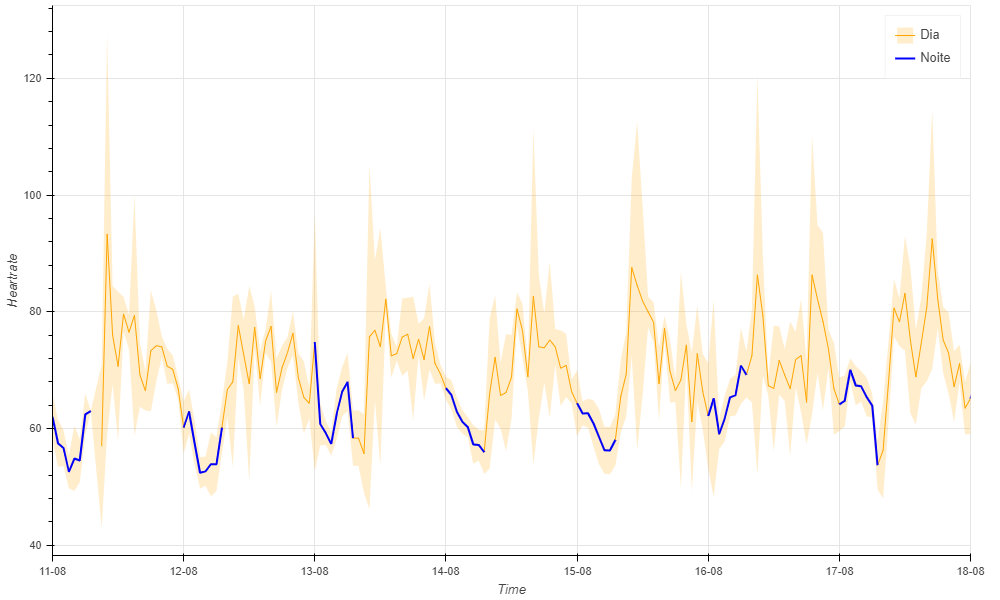

### The nurse loved the plot! But you know, as they say, give an hand and they want the whole arm..



## Exercise 6
### The nurse now wants to see scatter plots with the bpm, diastolic and systolic fields.
#### Each scatter should have different colors!

**Note** These measures are taken once, each day.

In [56]:
bpm  = df[["bpm","diastolic","systolic"]].dropna() #Select these fields.

In [46]:
fig = figure(width=800,height=500,x_axis_type="datetime",x_axis_label="Time",y_axis_label="Values",x_range=Range1d(start = interval[0],end=interval[1],bounds=interval),tools="hover,save")

index = 0
colors = ["blue","orange","red"]
for key in bpm.keys():
    fig.scatter(df.index,bpm[key],legend_label=key,color= colors[index],size=5)
    index = index + 1
fig.legend.click_policy="hide" 

show(fig)

## Exercise 6.1
#### The nurse doesnt need to see that much samples, resample it to 2 days (2D).

In [47]:
bpm_2D = bpm.resample("2D").mean()

In [48]:
fig = figure(width=800,height=500,x_axis_type="datetime",x_axis_label="Time",y_axis_label="Values",x_range=Range1d(start = interval[0],end=interval[1],bounds=interval),tools="hover,save")

index = 0
colors = ["blue","orange","red"]
for key in bpm_2D.keys():
    fig.scatter(bpm_2D.index,bpm_2D[key],legend_label=key,color= colors[index],size=5)
    index = index + 1
fig.legend.click_policy="hide" 
show(fig)

### The nurse thinks that it's uhmm, ugly. 
She gave the following requirements:
* Each value should be written in the plot straightaway as text.
* BPM values should be plotted with circles
* Diastolic and sistolic should be an area.



In [188]:
bpm = bpm.resample("1D").mean()


In [194]:
fig = figure(width=800,height=500,x_axis_type="datetime",x_axis_label="Time",y_axis_label="Values",x_range=Range1d(start = interval[0],end=interval[1],bounds=interval),tools="hover,save,pan,xwheel_zoom",tooltips="Value:@y")

source = ColumnDataSource(data=dict(
                                    x=bpm.index,
                                    y=bpm["bpm"].values,
                                    systolic = bpm["systolic"].values,
                                    diastolic = bpm["diastolic"].values
                                    ))

fig.varea(x = "x",y1="systolic",y2="diastolic",source=source, color="blue",fill_alpha=0.2)
fig.line(x = "x",y="y",color="orange",level="underlay",source=source)


fig.circle(x="x",y="y",color="orange",size=25,level="underlay",source=source,legend_label="BPM")
labels = LabelSet(x="x", y="y", text="y", level='glyph',
              x_offset=-10, y_offset=-10, source=source, render_mode='canvas',text_color="white")


fig.add_layout(labels)

sys = LabelSet(x="x", y="systolic", text="systolic", level='glyph',
              x_offset=-10, y_offset=5, source=source, render_mode='canvas',text_color="gray")


fig.add_layout(sys)
dys = LabelSet(x="x", y="diastolic", text="diastolic", level='glyph',
              x_offset=-10, y_offset=-20, source=source, render_mode='canvas',text_color="gray")


fig.add_layout(dys)

callback = CustomJS(args=dict(source=source),code="""

let diff_days = (this.end - this.start)/(1000 *60*60*24);

let sample = diff_days%7

let data = source.data
//data.bpm = ""

data.emit()
""")

#fig.x_range.js_on_change('start',callback)
#fig.x_range.on_change('end', lambda attr, old, new: print("End", new))
show(fig)

In [165]:
fig.x_range.bounds

(Timestamp('2020-07-20 12:00:00', freq='3H'),
 Timestamp('2020-08-18 15:00:00', freq='3H'))

In [120]:
bpm

,bpm,diastolic,systolic
2020-07-20,69.0,84.0,125.0
2020-07-21,72.0,73.0,132.0
2020-07-22,71.0,75.0,129.0
2020-07-23,64.0,72.0,129.0
2020-07-24,69.5,74.0,137.5
2020-07-25,66.0,78.0,156.0
2020-07-26,62.0,75.0,150.0
2020-07-27,64.0,76.0,148.0
2020-07-28,62.0,78.0,149.0
2020-07-29,68.0,81.0,153.0


## Exercise 7
### The nurse now wants to correlate the heart rate (exercise 5) with the patient activity!

##### Keep in mind that the patient activity (steps) are recorded daily at day X, with the data of day X - 1

##### Think about how you can plot the step data.

*Start of with the result of exercise 5 if you succeeded, else just start anew*

*Try with different resample values*


In [ ]:
#Select the required fields and resample as you wish.
resample3H = df[["heartrate","steps"]].resample("3H")

In [ ]:
#Compute the mean and the std.
mean =resample3H.mean()
std =resample3H.std(ddof=1)


In [ ]:
#mean["steps"] = mean["steps"].shift(periods=-8)/50 #Steps are one day late. Shift the steps back one day. The resampling value used changes the number of shifts needed!

In [ ]:
fig = figure(width=800,height=500,x_axis_type="datetime",x_axis_label="Time",y_axis_label="Heartrate",tools="pan,hover,xwheel_zoom,reset") #Add bounds and a initial range of the day past days.
fig.line(mean.index,mean["heartrate"],legend_label="mean",color="orange")
fig.vbar(x = mean.index,top = mean["steps"],legend_label="steps",color="black",width=24*60*60*60,fill_alpha = 0.5)

In [ ]:
upper = mean+std
lower = mean-std

In [ ]:
fig.varea(x=mean.index,y1= upper["heartrate"], y2= lower["heartrate"],legend_label="std",color="orange",fill_alpha=0.2)

In [ ]:
fig.legend.click_policy="hide" 
fig.line(mean.index,[120 for i in range(0,len(mean.index))],color="red")
show(fig)

*Hint* You are plotting measures with different ranges. Do not forget to normalize/standardize the steps, else the plot will be too hard to read!

## Free roam !
##### What would you improve here?
##### Do you think this plot is any good for the nurse or doctors?
##### How can you help the nurses work so that she/he can give better assistance to his/her patient?